<a href="https://colab.research.google.com/github/LulyaHaile/ds2003/blob/main/FinalProjectEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# DataSet
df = pd.read_csv("diabetes_dataset.csv")

# size of dataset
print(df.shape)

(100000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_ho

In [ ]:
# info
df.info()

In [ ]:
# head
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [ ]:
# seperate categorical and numerical features
categorical = df.select_dtypes(include=['object', 'category']).columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'family_history_diabetes',
    'bmi',
    'systolic_bp',
    'heart_rate',
    'cholesterol_total',
    'glucose_fasting',
    'insulin_level',
    'diabetes_risk_score'
  ]

print(f"Categorical features: {len(categorical)}: {list(categorical)}")
print(f"Numerical features: {len(numerical)}: {list(numerical)}")
print(f"Selected numerical features: {len(num_cols)} : {num_cols}")

Categorical features: 7: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']
Numerical features: 24: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diagnosed_diabetes']
Selected numerical features: 14 : ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'bmi', 'systolic_bp', 'heart_rate', 'cholesterol_total', 'glucose_fasting', 'insulin_level', 'diabetes_risk_score']


In [ ]:
# Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe)

<bound method NDFrame.describe of        age  gender ethnicity education_level  income_level employment_status  \
0       58    Male     Asian      Highschool  Lower-Middle          Employed   
1       48  Female     White      Highschool        Middle          Employed   
2       60    Male  Hispanic      Highschool        Middle        Unemployed   
3       74  Female     Black      Highschool           Low           Retired   
4       46    Male     White        Graduate        Middle           Retired   
...    ...     ...       ...             ...           ...               ...   
99995   46    Male     Other        Graduate  Upper-Middle        Unemployed   
99996   41  Female     White        Graduate        Middle          Employed   
99997   57  Female     Black       No formal  Upper-Middle          Employed   
99998   47  Female     Black      Highschool  Lower-Middle           Retired   
99999   52  Female     White    Postgraduate        Middle          Employed   

     

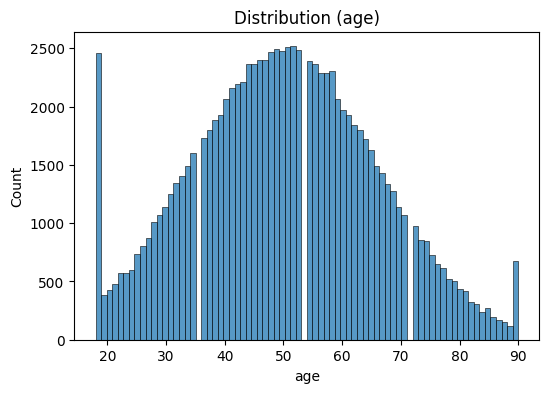

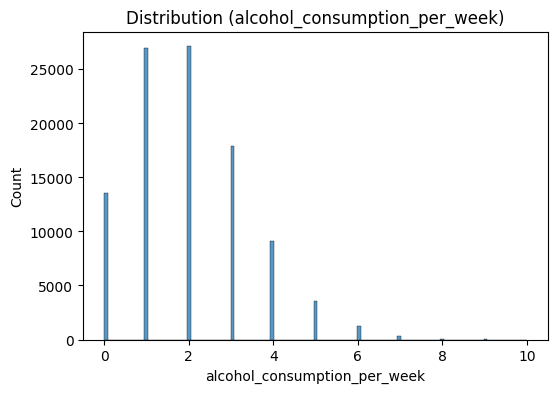

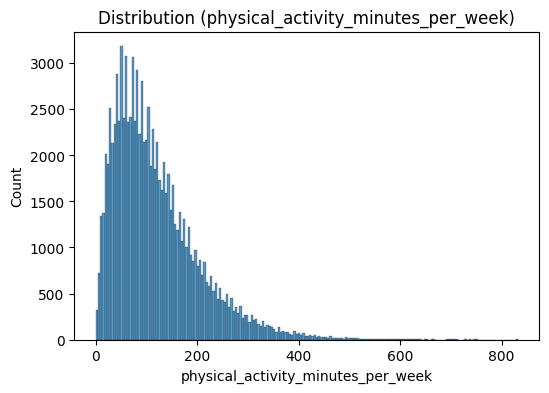

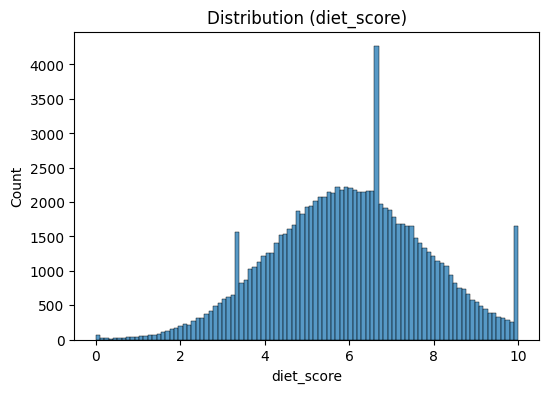

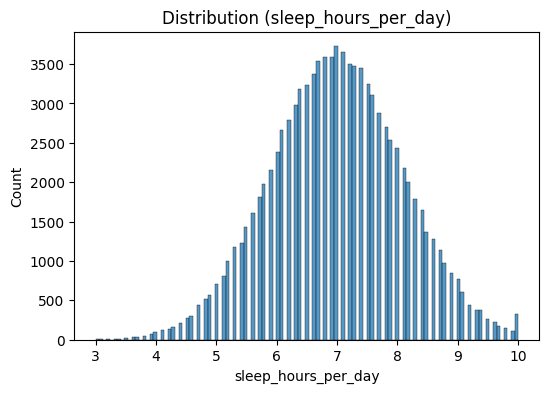

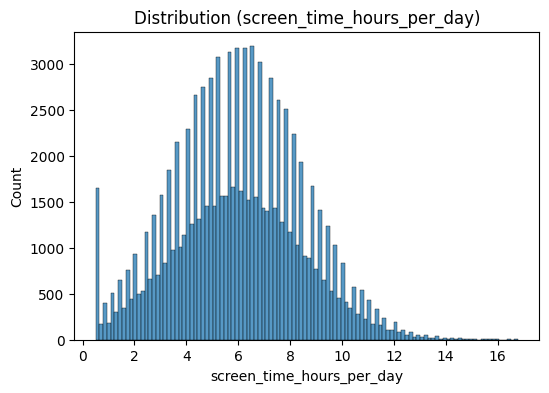

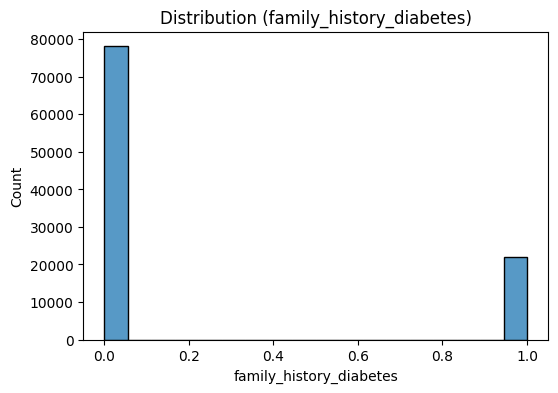

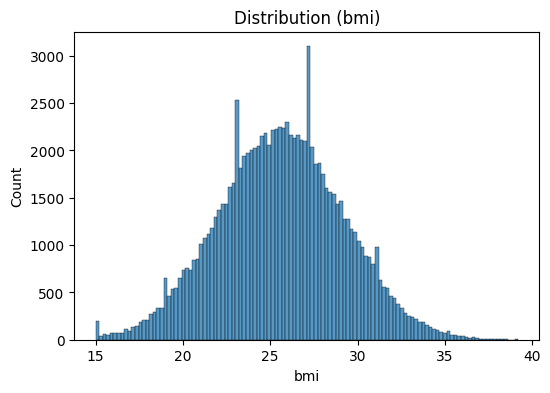

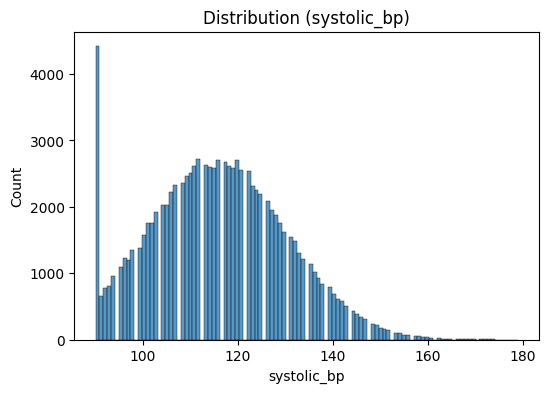

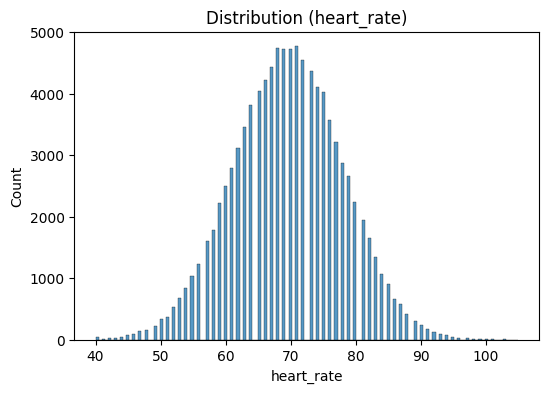

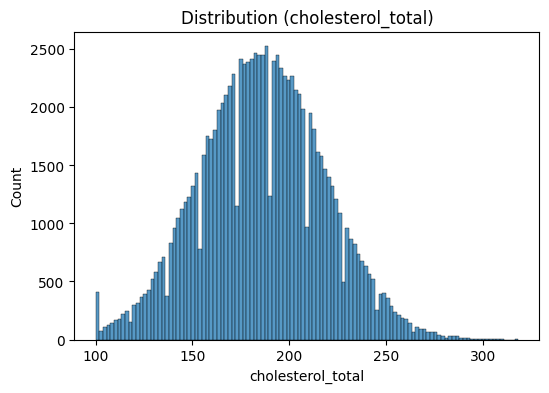

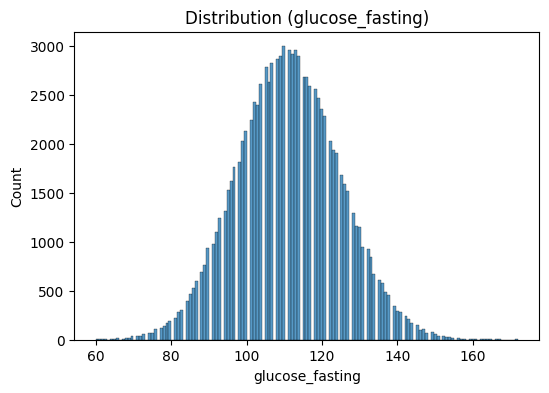

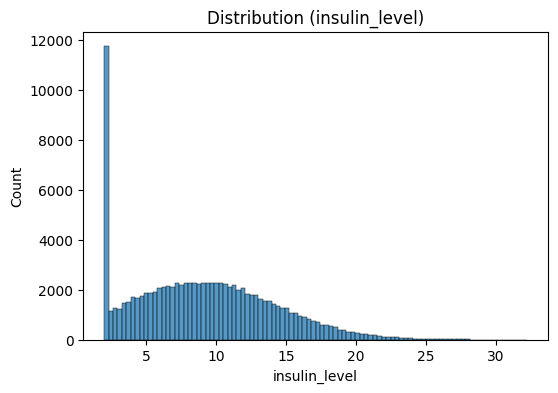

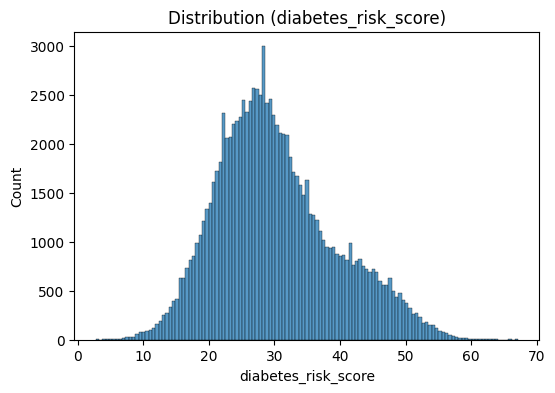

In [ ]:
# histogram for visualization
for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col])
  plt.title(f"Distribution ({col})")
  plt.show()

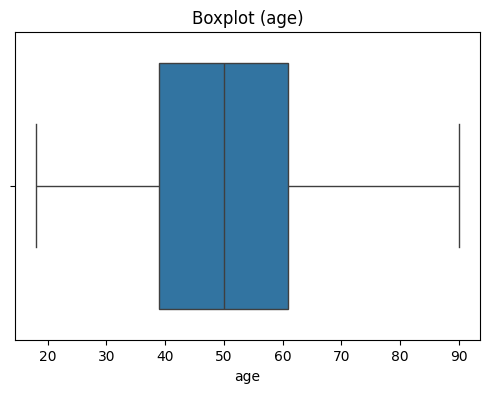

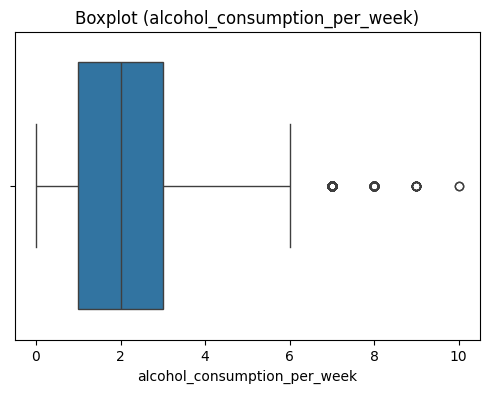

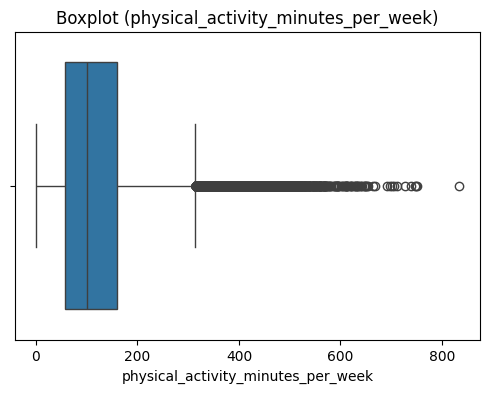

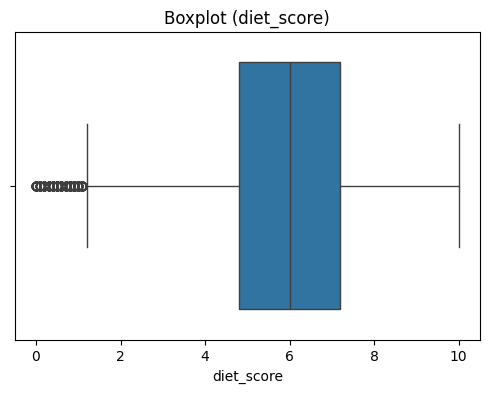

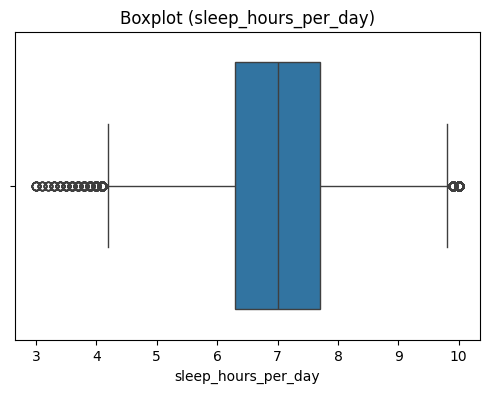

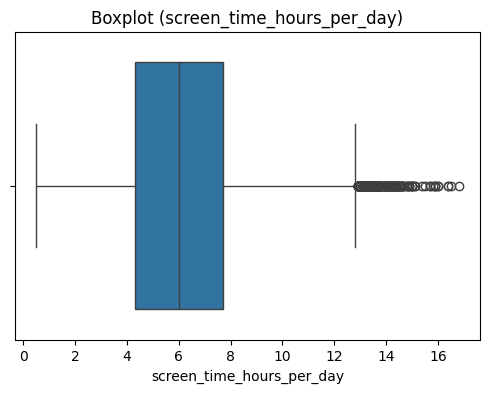

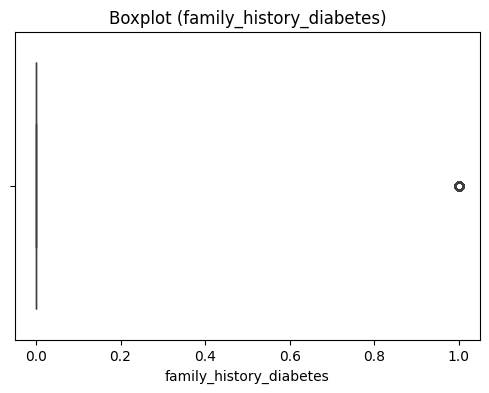

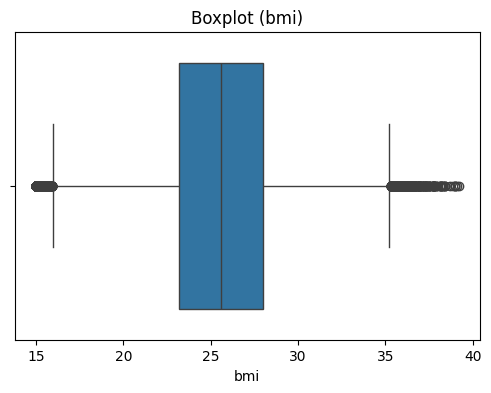

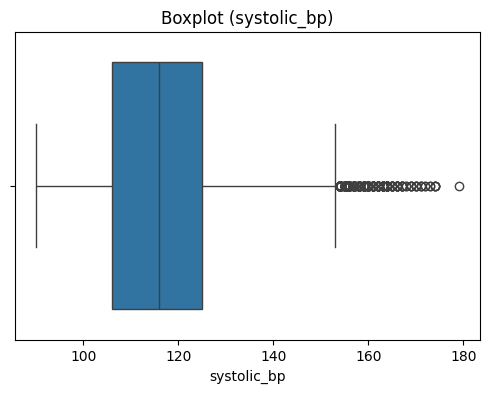

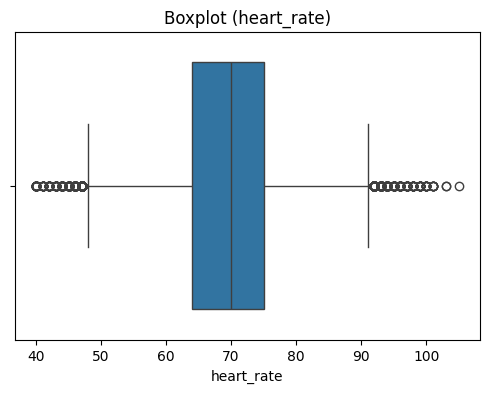

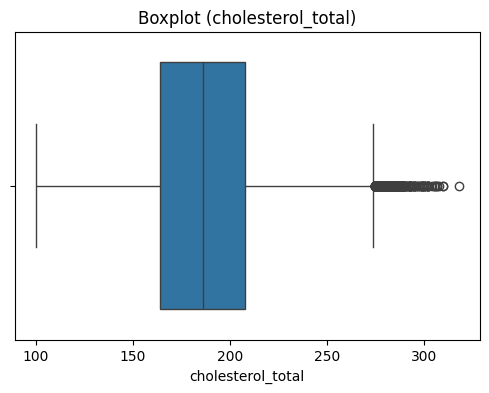

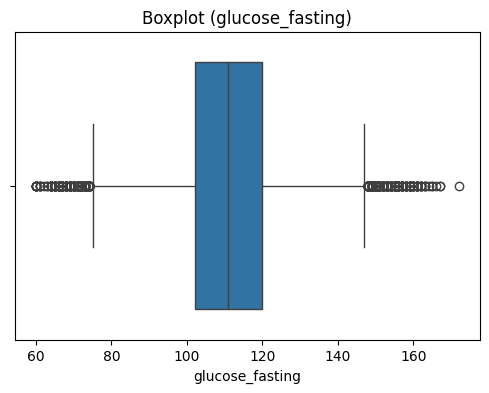

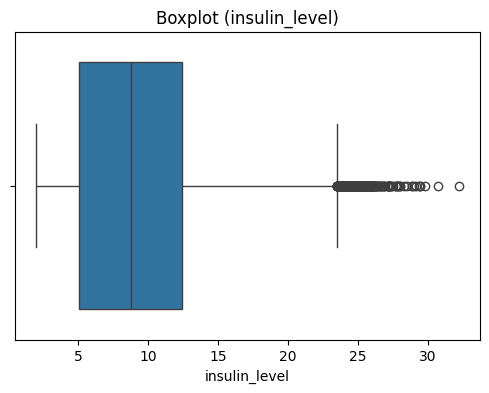

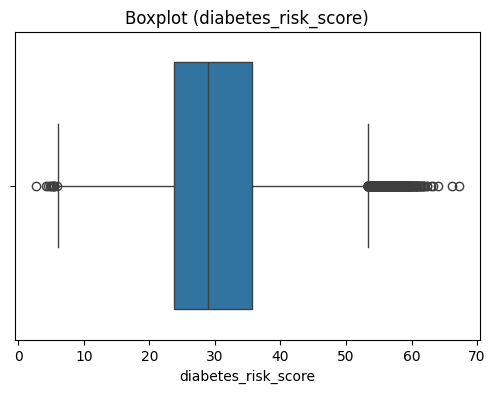

In [ ]:
# check for outliers
for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot ({col})")
  plt.show()

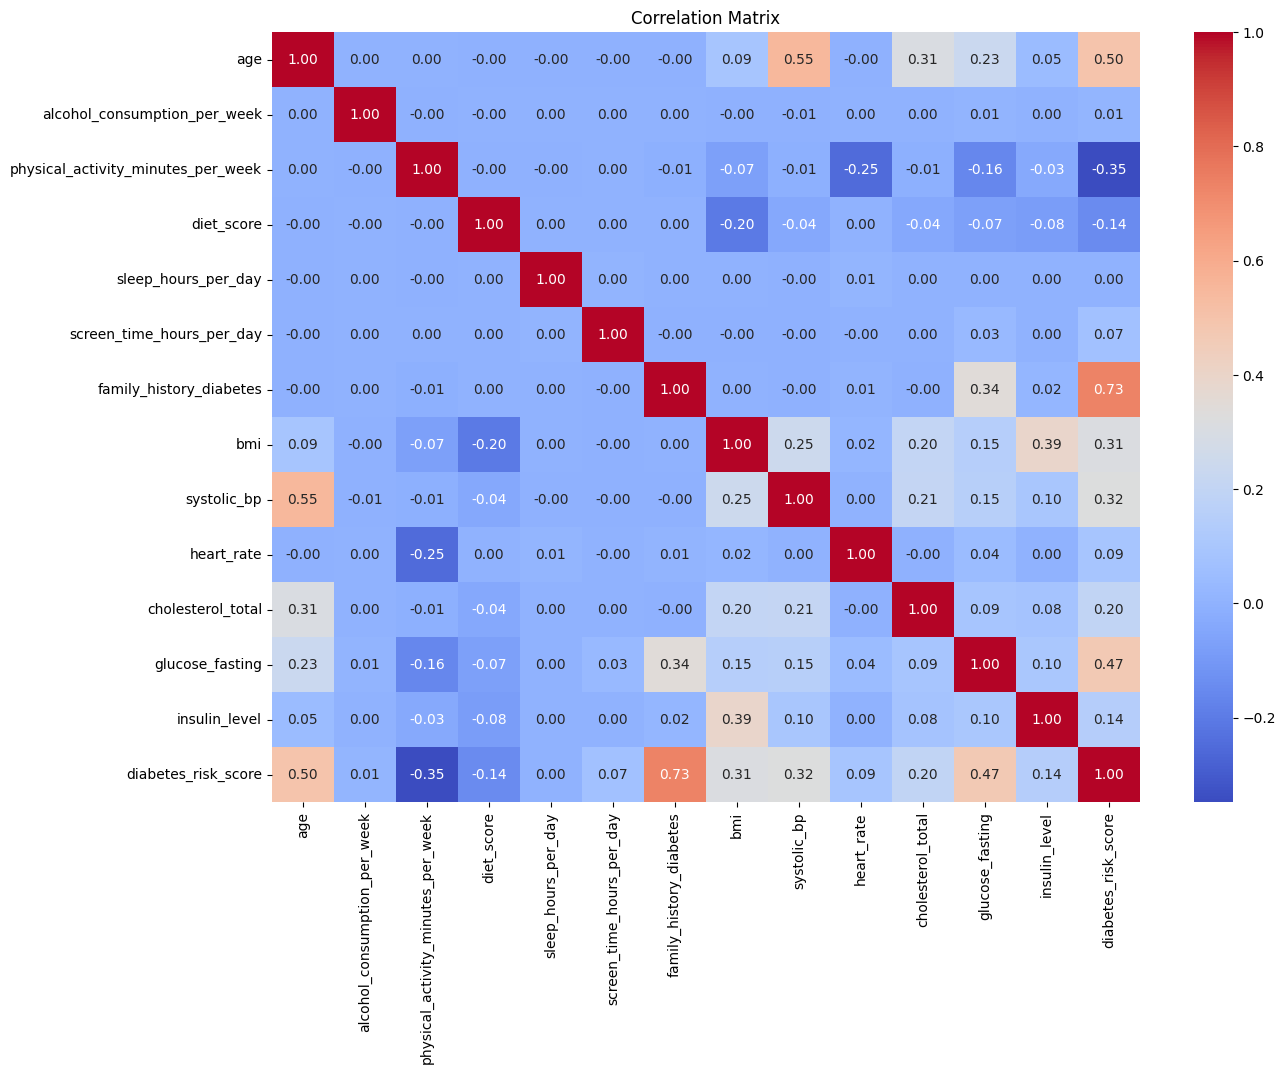

In [ ]:
# correlation between varibales

# correlation matrix
corr = df[num_cols].corr()

# heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

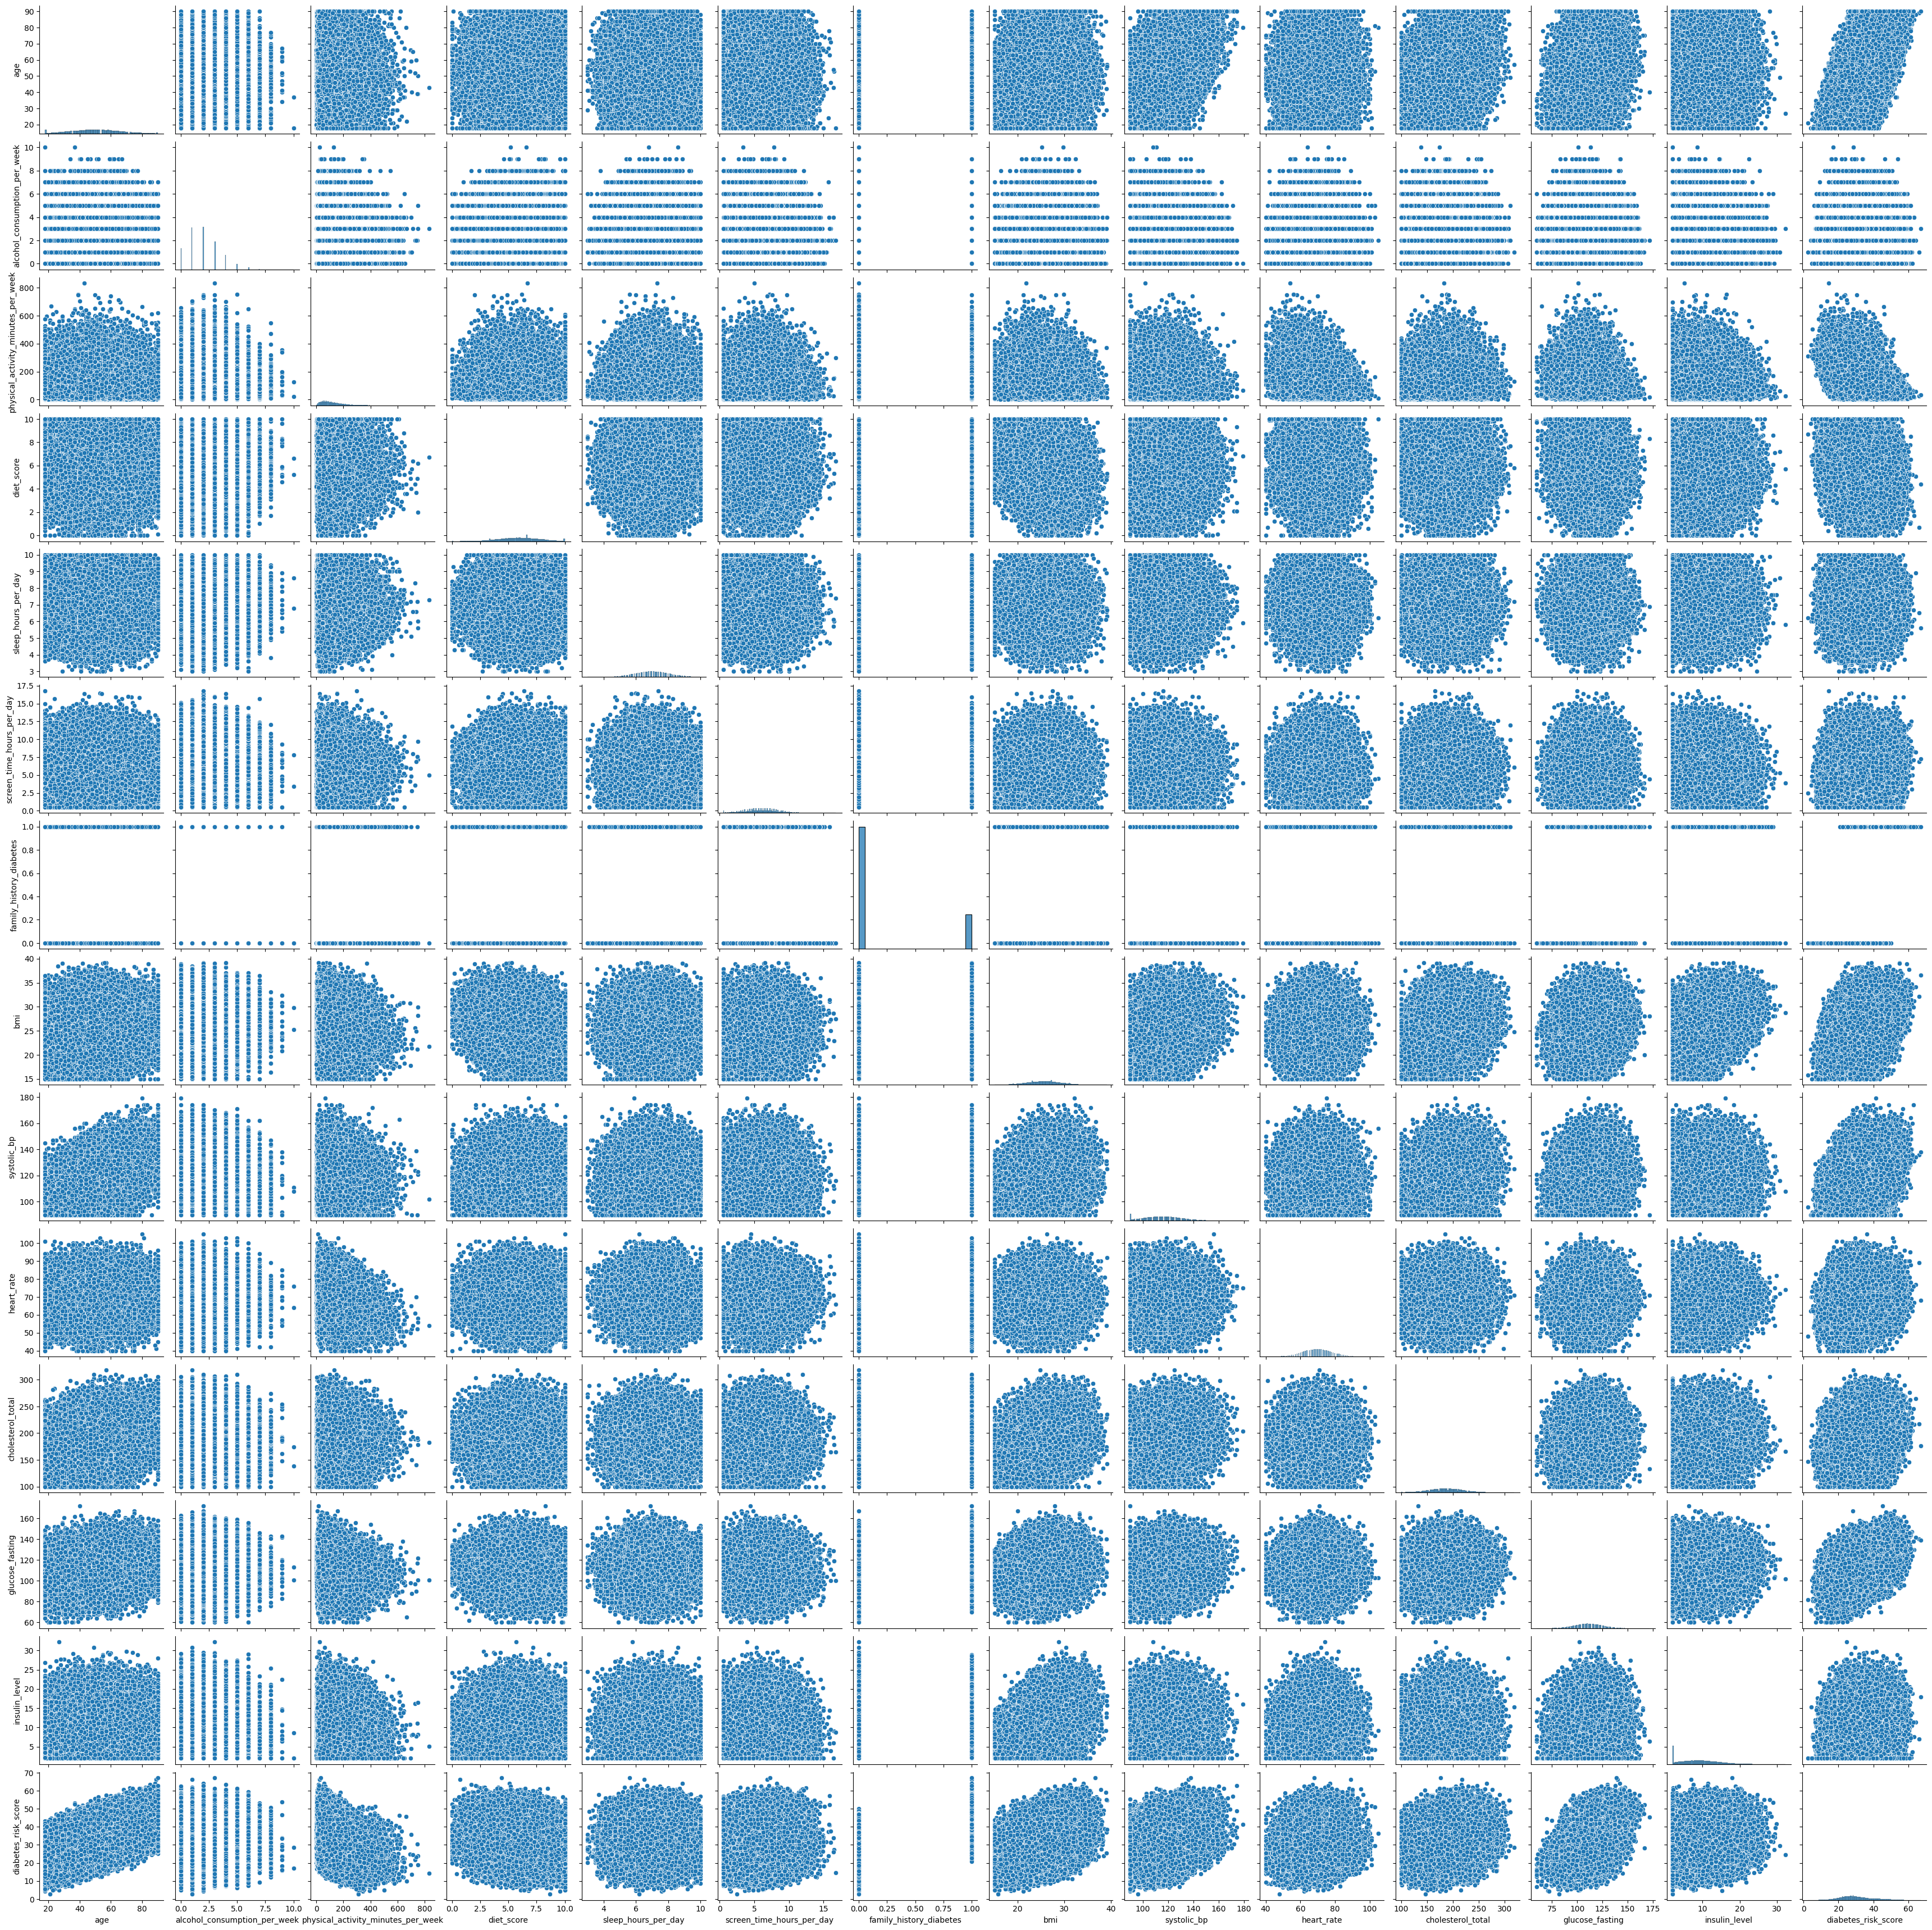

In [ ]:
# pairplot to visualize pairwise relationships
sns.pairplot(df[num_cols])
plt.show()
